Najpierw w konsoli: 
pip install -r requirements.txt

In [37]:
from huggingface_hub import hf_hub_download
from huggingface_hub import login
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image
import numpy as np
import pandas as pd
from PIL import ImageEnhance
import random
import keras
from keras import ops
from keras import layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
import torch
import torchvision.transforms as transforms


In [38]:
# stworzyć konto na hugging face, logowanie przy użyciu utworzonego tokena
login()

In [39]:
ds = load_dataset("mertcobanov/animals")  # WA: jeśli wyrzuca brak uprawnień, uruchomić tą komórkę jeszcze raz

Resolving data files:   0%|          | 0/5400 [00:00<?, ?it/s]

In [40]:
# zamiana na obiekt DataFrame - imo łatwiejsza praca
df = ds['train'].to_pandas()

In [41]:
# 90 klas oznaczonych numerami, trzeba ręcznie zamienić
unique_labels = set(df['label'])
print(len(unique_labels))
unique_labels

90


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89}

In [42]:
# słownik mapujący etykiety liczbowe na słowne
name_change = {
0: 'antelope'         ,
1: 'badger'           ,
2: 'bat'              ,
3: 'bear'             ,
4: 'bee'              ,
5: 'beetle'           ,
6: 'bison'            ,
7: 'boar'             ,
8: 'butterfly'        ,
9: 'cat'              ,
10: 'caterpillar'     ,
11: 'chimpanzee'      ,
12: 'cockroach'       ,
13: 'cow'             ,
14: 'coyote'          ,
15: 'crab'            ,
16: 'crow'            ,
17: 'deer'            ,
18: 'dog'             ,
19: 'dolphin'         ,
20: 'donkey'          ,
21: 'dragonfly'       ,
22: 'duck'            ,
23: 'eagle'           ,
24: 'elephant'        ,
25: 'flamingo'        ,
26: 'fly'             ,
27: 'fox'             ,
28: 'goat'            ,
29: 'goldfish'        ,
30: 'goose'           ,
31: 'gorilla'         ,
32: 'grasshopper'     ,
33: 'hamster'         ,
34: 'hare'            ,
35: 'hedgehog'        ,
36: 'hippopotamus'    ,
37: 'hornbill'        ,
38: 'horse'           ,
39: 'hummingbird'     ,
40: 'hyena'           ,
41: 'jellyfish'       ,
42: 'kangaroo'        ,
43: 'koala'           ,
44: 'ladybugs'        ,
45: 'leopard'         ,
46: 'lion'            ,
47: 'lizard'          ,
48: 'lobster'         ,
49: 'mosquito'	      ,
50: 'moth'	          ,
51: 'mouse'           ,
52: 'octopus'	      ,
53: 'okapi'           ,
54: 'orangutan'       ,
55: 'otter'           ,
56: 'owl'             ,
57: 'ox'              ,
58: 'oyster'          ,
59: 'panda'	          ,
60: 'parrot'	      ,
61: 'pelecaniformes',	
62: 'penguin'	      ,
63: 'pig'	          ,
64: 'pigeon'          ,
65: 'porcupine'	      ,
66: 'possum'          ,
67: 'raccoon'	      ,
68: 'rat'	          ,
69: 'reindeer'	      ,
70: 'rhinoceros'      ,
71: 'sandpiper'       ,
72: 'seahorse'        ,
73: 'seal'            ,
74: 'shark'           ,
75: 'sheep'	          ,
76: 'snake'	          ,
77: 'sparrow'	      ,
78: 'squid'	          ,
79: 'squirrel'	      ,
80: 'starfish'        ,
81: 'swan'            ,
82: 'tiger'	          ,
83: 'turkey'          ,
84: 'turtle'          ,
85: 'whale'	          ,
86: 'wolf'            ,
87: 'wombat'	      ,
88: 'woodpecker'	  ,
89: 'zebra'           ,
}

In [43]:
df['label'] = df['label'].map(name_change)
df

,image,label
0,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",antelope
1,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",antelope
2,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",antelope
3,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",antelope
4,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",antelope
...,...,...
5395,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",zebra
5396,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",zebra
5397,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",zebra
5398,"{'bytes': None, 'path': 'C:\Users\mmaruszewski...",zebra


In [44]:
df.iloc[1]["image"]

{'bytes': None,
 'path': 'C:\\Users\\mmaruszewski\\.cache\\huggingface\\hub\\datasets--mertcobanov--animals\\snapshots\\cfafe186d34b9cf24e232b58c3423aab055a917c\\animals\\antelope\\03d7fc0888.jpg'}

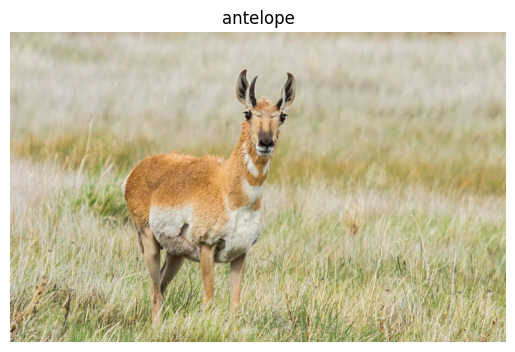

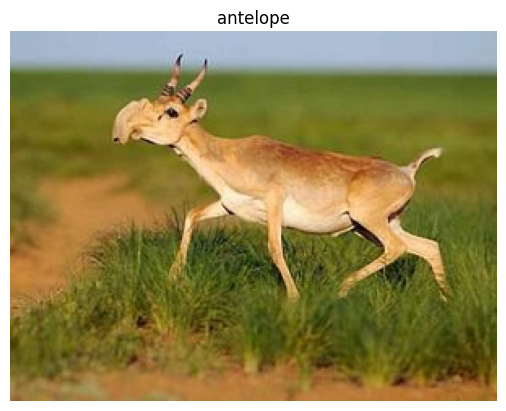

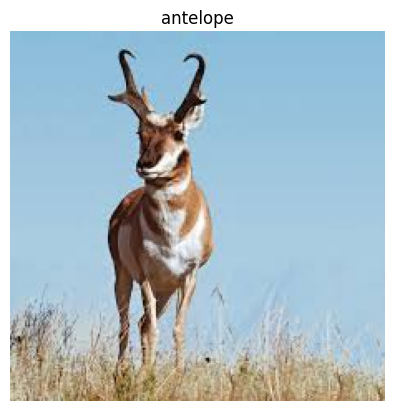

In [45]:
# podgląd kilku przykładowych zdj.

x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

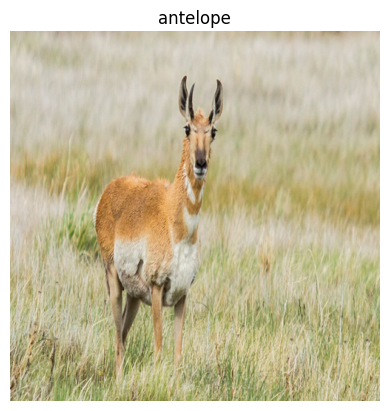

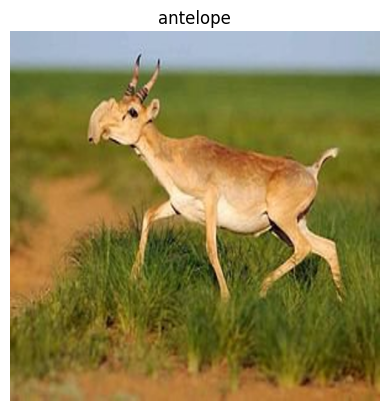

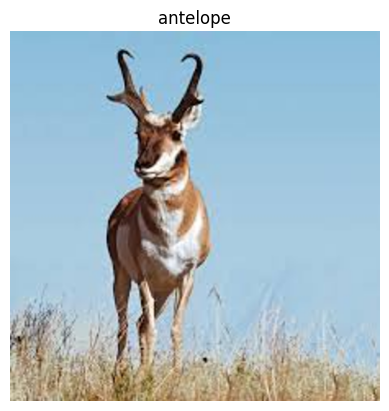

In [46]:
# Wyświetlanie wybranych zdjęć po próbnym ujednoliceniu rozmiaru i normalizacji wartości pikseli
x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    image = image.resize((500, 500))
    pixels = np.asarray(image).astype('float32') / 255.0
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

In [47]:
# Sprawdzenie największych i najmniejszych wysokości i szerokości zdjęć
imgs_widths = []
imgs_heights = []

for i, img_info in enumerate(df['image']):
    image_path = img_info['path']
    image = Image.open(image_path)
    imgs_widths.append(image.size[0])
    imgs_heights.append(image.size[1])

print(f"Najmniejsza szerokość zdjęcia: {min(imgs_widths)}")
print(f"Największa szerokość zdjęcia: {max(imgs_widths)}")
print(f"Najmniejsza wysokość zdjęcia: {min(imgs_heights)}")
print(f"Największa wysokość zdjęcia: {max(imgs_heights)}")

Najmniejsza szerokość zdjęcia: 145
Największa szerokość zdjęcia: 4928
Najmniejsza wysokość zdjęcia: 120
Największa wysokość zdjęcia: 4064


In [48]:
def crop_image(image, crop_size=(300, 300)):
    width, height = image.size
    crop_width, crop_height = crop_size
    left = random.randint(0, width - crop_width)
    upper = random.randint(0, height - crop_height)
    cropped_image = image.crop((left, upper, left + crop_width, upper + crop_height))
    return cropped_image


def adjust_brightness(image, brightness_range=(0.8, 1.2)):
    enhancer = ImageEnhance.Brightness(image)
    brightness_factor = random.uniform(*brightness_range)
    enhanced_image = enhancer.enhance(brightness_factor)
    return enhanced_image


In [54]:
def preprocess_image(image_path, size=(500, 500)):
    image = Image.open(image_path).resize(size)
    return np.asarray(image).astype('float32') / 255.0

df['resized_images'] = df['image'].apply(lambda img_info: preprocess_image(img_info['path']))


MemoryError: Unable to allocate 2.86 MiB for an array with shape (500, 500, 3) and data type float32

In [35]:
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler

In [36]:
# Feature 1: Edge Detection
def extract_edges(image):
    grayscale = rgb2gray(image)  # Convert to grayscale
    edges = canny(grayscale)    # Apply Canny edge detection
    return edges

df['edge_features'] = df['resized_images'].apply(extract_edges)

NameError: name 'df' is not defined

In [ ]:
def extract_color_histogram(image):
    # Flatten image and calculate histogram for each channel (RGB)
    hist_red = np.histogram(image[:, :, 0], bins=32, range=(0, 1))[0]
    hist_green = np.histogram(image[:, :, 1], bins=32, range=(0, 1))[0]
    hist_blue = np.histogram(image[:, :, 2], bins=32, range=(0, 1))[0]
    return np.concatenate([hist_red, hist_green, hist_blue])

df['color_histograms'] = df['resized_images'].apply(extract_color_histogram)

In [ ]:
def apply_pca(features, n_components=50):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(scaled_features)
    return reduced_features

In [ ]:
# Combine extracted features (edge and color histogram) for PCA
combined_features = np.array(
    df['edge_features'].apply(lambda x: x.flatten()).tolist()
)  # Flatten edge features

color_features = np.array(df['color_histograms'].tolist())
all_features = np.hstack([combined_features, color_features])

In [ ]:
# Apply PCA for dimensionality reduction
reduced_features = apply_pca(all_features)

# Add reduced features to DataFrame
df['pca_features'] = list(reduced_features)

In [ ]:
# Visualization of examples
for i in range(3):  # Display first 3 images and their processed features
    plt.figure(figsize=(12, 4))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(df['resized_images'][i])
    plt.title(f"Original: {df['label'][i]}")
    plt.axis('off')

    # Edge detection
    plt.subplot(1, 3, 2)
    plt.imshow(df['edge_features'][i], cmap='gray')
    plt.title("Edge Detection")
    plt.axis('off')

    # PCA visualization (first two principal components)
    plt.subplot(1, 3, 3)
    plt.scatter(reduced_features[i, 0], reduced_features[i, 1], c='red')
    plt.title("PCA Features")
    plt.axis('off')

    plt.show()

In [6]:
# Wyciągamy ścieżki zdjęć do nowej kolumny
df['image_paths'] = df['image'].apply(lambda row: row['path'])

In [7]:
# Tworzymy obiekty zdjęć pillow ze zdjęć podanych w ścieżkach
df['raw_images'] = df['image_paths'].apply(lambda image_path: Image.open(image_path))

In [9]:
# WA żeby sobie szybciej eksperymentować na stu wierszach
# df['raw_images'] = df['raw_images'].head(100)
# df.dropna(inplace=True)

In [8]:
# Normalizujemy wymiary zdjęć do 300 x 300 pikseli
df['resized_images'] = df['raw_images'].apply(lambda raw_image: raw_image.resize((300, 300)))

In [9]:
df.drop(['image', 'image_paths', 'raw_images'], axis=1, inplace=True)

In [10]:
# Wymiary obiektów zdjęć
np.array(df['resized_images'].iloc[0]).shape

(300, 300, 3)

In [11]:
# Nowy zestaw zdjęć, który przycinamy do rozmiaru 280 x 280 dla augmentacji
df['cropped_images'] = df['resized_images'].apply(lambda resized_image: crop_image(resized_image, crop_size=(280, 280)))

In [12]:
# Przycięty zestaw zdjęć skalujemy do rozmiaru 300 x 300, aby wszystkie zdjęcia miały jednakowe wymiary, lecz część
# zdjęć utraciła pewną powierzchnię tła, a kształty zwięrząt stały się większe
df['cropped_images'] = df['cropped_images'].apply(lambda cropped_image: cropped_image.resize((300, 300)))

In [13]:
# Utworzenie zestawu zdjęć ze zmienioną jasnością dla augmentacji
df['brightness_adjusted_images'] = df['resized_images'].apply(lambda resized_image: adjust_brightness(resized_image))

In [ ]:
# df['processed_images'] = df['resized_images'].apply(lambda resized_image: np.asarray(resized_image).astype('float32') / 255.0)
# df = df.assign(PIL_images = lambda x: Image.open(list(x['image_paths'])).resize((500, 500)))
# df = df.assign(PIL_images = lambda x: map(lambda x: Image.open(x), x['image_paths']))

In [14]:
# Zamienia obiekt Pillow image w tensor i normalizuje piksele do skali 0-1
# df['resized_images'] = df['resized_images'].apply(lambda resized_image: np.asarray(resized_image).astype('float16') / 255.0)
transform = transforms.Compose([transforms.ToTensor()])
df['resized_images'] = df['resized_images'].apply(lambda resized_image: transform(resized_image).permute((1, 2, 0)))

In [15]:
# df['cropped_images'] = df['cropped_images'].apply(lambda cropped_images: np.asarray(cropped_images).astype('float32') / 255.0)
df['cropped_images'] = df['cropped_images'].apply(lambda cropped_images: transform(cropped_images).permute((1, 2, 0)))

In [16]:
# df['brightness_adjusted_images'] = df['brightness_adjusted_images'].apply(lambda brightness_adjusted_images: np.asarray(brightness_adjusted_images).astype('float32') / 255.0)
df['brightness_adjusted_images'] = df['brightness_adjusted_images'].apply(lambda brightness_adjusted_images: transform(brightness_adjusted_images).permute((1, 2, 0)))

In [17]:
df = pd.concat([pd.concat([df['resized_images'], df['cropped_images'], df['brightness_adjusted_images']], join='outer', ignore_index=True), pd.concat([df['label'], df['label'], df['label']], join='outer', ignore_index=True)], axis=1, ignore_index=True)

In [18]:
df.rename(columns={0: 'images', 1: 'labels'}, inplace=True)

In [19]:
df['labels'] = df['labels'].apply(lambda label: torch.tensor(label))

In [ ]:
# Opcjonalny zapis na dysku
df.to_pickle(r'animals_data_frame.pkl')

In [ ]:
# Opcjonalny odczyt z dysku
df = pd.read_pickle(r'animals_data_frame.pkl')

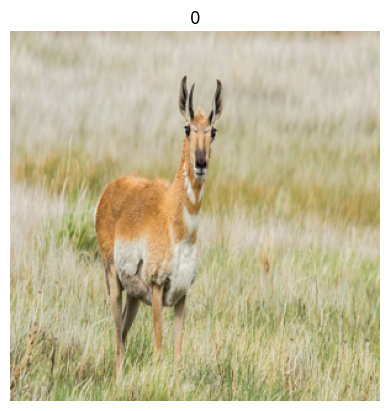

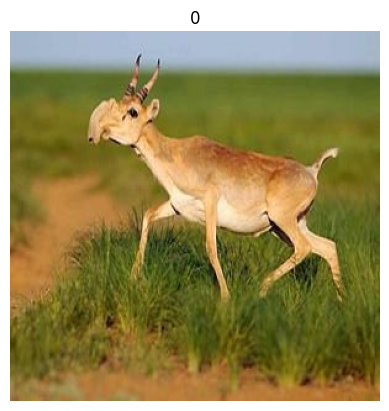

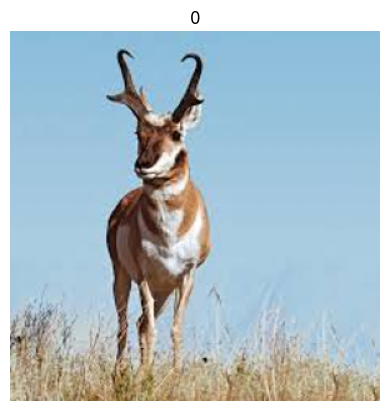

In [71]:
for label, image in zip(df['labels'][:3], df['images'][:3]):
    plt.figure()
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()

In [20]:
# Przygotowanie danych do transformera

X = df.drop(["labels"], axis=1)
y = df["labels"]

x_train_valid, x_test, y_train_valid, y_test = train_test_split(X,
                                                                y,
                                                                test_size=0.20,
                                                                stratify=y,
                                                                random_state=42)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid,
                                                      y_train_valid,
                                                      test_size=0.20,
                                                      stratify=y_train_valid,
                                                      random_state=42)

del df
del X
del y
del x_train_valid
del y_train_valid

x_train = torch.stack(tuple(x_train['images']))
x_valid = torch.stack(tuple(x_valid['images']))
x_test = torch.stack(tuple(x_test['images']))
y_train = torch.stack(tuple(y_train))
y_valid = torch.stack(tuple(y_valid))
y_test = torch.stack(tuple(y_test))

In [21]:
x_train.shape

torch.Size([10368, 300, 300, 3])

In [31]:
# Konfiguracja hiperparametrów
num_classes = len(torch.unique(y_train))  # 90
input_shape = (300, 300, 3,)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 100
num_epochs = 30  # For real training, use num_epochs=100. 10 is a test value
image_size = 300  # We'll resize input images to this size
patch_size = 30  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier


In [33]:
# Implementacja wielowarstwowego perceptronu MLP
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Implementacja patchu jako warstwy
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]  # do wyświetlenia pojedynczego obrazu: batch_size = 1
        height = input_shape[1]  # do wyświetlenia pojedynczego obrazu: height = input_shape[0]
        width = input_shape[2]  #  do wyświetlenia pojedynczego obrazu: width = input_shape[1]
        channels = input_shape[3]  #  do wyświetlenia pojedynczego obrazu: channels = input_shape[2]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

Image size: 300 X 300
Patch size: 30 X 30
Patches per image: 100
Elements per patch: 2700


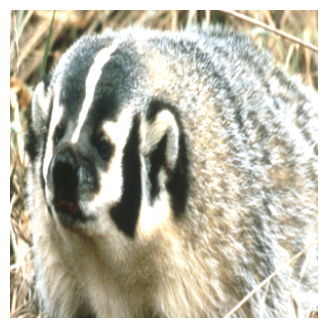

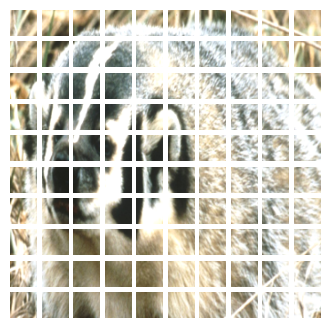

In [27]:
# Wyświetlenie patchu
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image)
plt.axis("off")

# resized_image = ops.image.resize(
#     ops.convert_to_tensor([image]), size=(image_size, image_size)
# )
patches = Patches(patch_size)(image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img))
    plt.axis("off")



In [35]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model



Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step - accuracy: 0.0125 - loss: 5.4185 - top-5-accuracy: 0.0556 - val_accuracy: 0.0116 - val_loss: 4.5009 - val_top-5-accuracy: 0.0550
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.0130 - loss: 4.5396 - top-5-accuracy: 0.0578 - val_accuracy: 0.0068 - val_loss: 4.5032 - val_top-5-accuracy: 0.0444
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.0118 - loss: 4.5289 - top-5-accuracy: 0.0592 - val_accuracy: 0.0135 - val_loss: 4.4876 - val_top-5-accuracy: 0.0723
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.0167 - loss: 4.5009 - top-5-accuracy: 0.0697 - val_accuracy: 0.0145 - val_loss: 4.4705 - val_top-5-accuracy: 0.0733
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.0122 - loss: 4.5027 - top-5-accuracy: 0.0617 - val_accuracy: 0.0174 - val_loss: 4.4319 - val_top-5-accuracy: 0.0897
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.0195 - loss: 4.4402 - top-5-a


Test top 5 accuracy: 89.2%


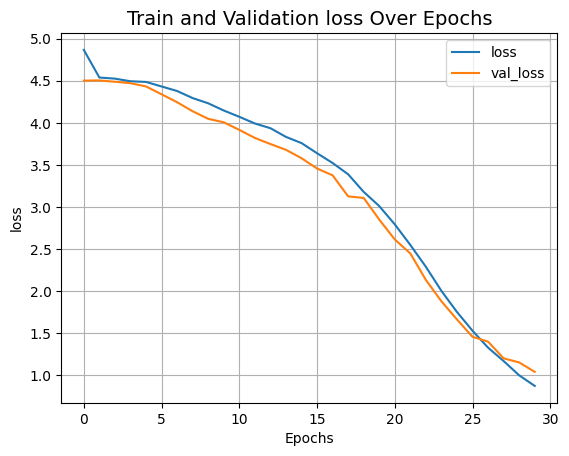

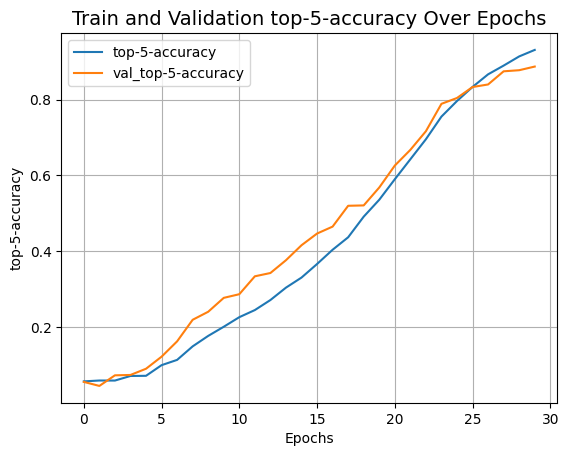

In [36]:
def run_training(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    # checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #     checkpoint_filepath,
    #     monitor="val_accuracy",
    #     save_best_only=True,
    #     save_weights_only=True,
    # )
    callbacks = [
        keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,),
        keras.callbacks.EarlyStopping(
        restore_best_weights=True,
        monitor='loss',
        patience=3)
    ]

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=callbacks,
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    model.save('model2.h5')
    model.save('model2.keras')

    return history, model


vit_classifier = create_vit_classifier()
history, model = run_training(vit_classifier)


def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("top-5-accuracy")


In [61]:
test_model = keras.models.load_model('model2.h5')
test_loss, test_acc = test_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

ValueError: Unknown layer: 'Patches'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [38]:
y_pred = model.predict(x_test)
for i in range(len(x_test)):
    print(f"Prediction is: {np.argmax(y_pred[i])}, Right answer is: {y_test[i]}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 391ms/step
Prediction is: 75, Right answer is: 75
Prediction is: 38, Right answer is: 38
Prediction is: 32, Right answer is: 32
Prediction is: 0, Right answer is: 39
Prediction is: 7, Right answer is: 57
Prediction is: 12, Right answer is: 69
Prediction is: 11, Right answer is: 11
Prediction is: 22, Right answer is: 22
Prediction is: 79, Right answer is: 79
Prediction is: 10, Right answer is: 10
Prediction is: 20, Right answer is: 20
Prediction is: 46, Right answer is: 65
Prediction is: 0, Right answer is: 0
Prediction is: 1, Right answer is: 1
Prediction is: 59, Right answer is: 1
Prediction is: 76, Right answer is: 76
Prediction is: 9, Right answer is: 9
Prediction is: 78, Right answer is: 78
Prediction is: 55, Right answer is: 19
Prediction is: 53, Right answer is: 53
Prediction is: 59, Right answer is: 59
Prediction is: 13, Right answer is: 13
Prediction is: 71, Right answer is: 71
Prediction is: 9, Right answer is: 9
Prediction is: 44, Right answer